In [1]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings(action="ignore")

In [6]:
files=os.listdir("../Project-1")

In [7]:
for f in files:
    print(f)

Admission_Predict_Ver1.1.csv
Project-1.docx
~$oject-1.docx


In [8]:
df = pd.read_csv("../Project-1/Admission_Predict_Ver1.1.csv")
df.shape

(500, 9)

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.isna().sum() 
# Since all are 0, means the data contains no Null values so no explicit handling required

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df.describe()
#df.columns

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<AxesSubplot:>

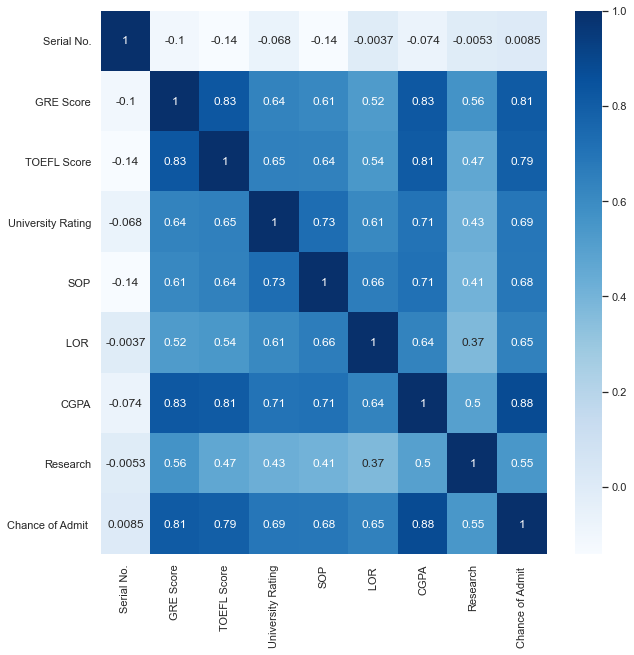

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Text(0.5, 1.0, 'CGPA vs Chance of Admit ')

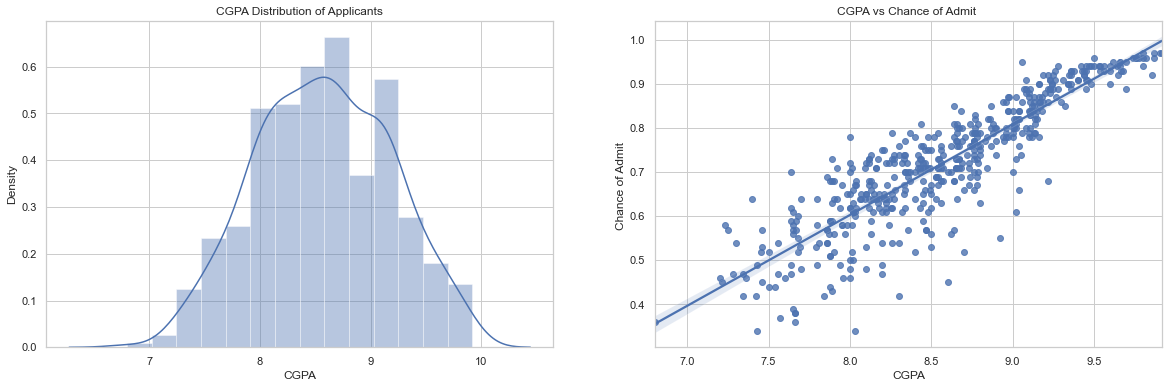

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit '])
plt.title('CGPA vs Chance of Admit ')

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit ')

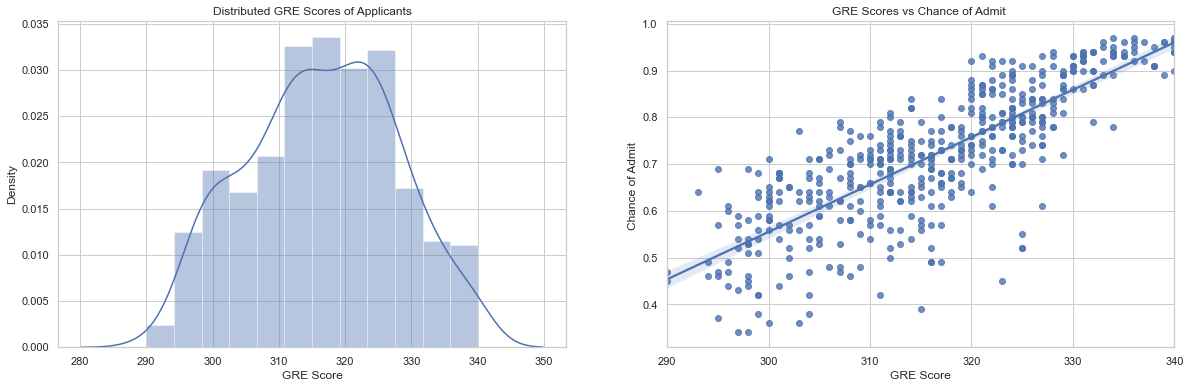

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit '])
plt.title('GRE Scores vs Chance of Admit ')

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit ')

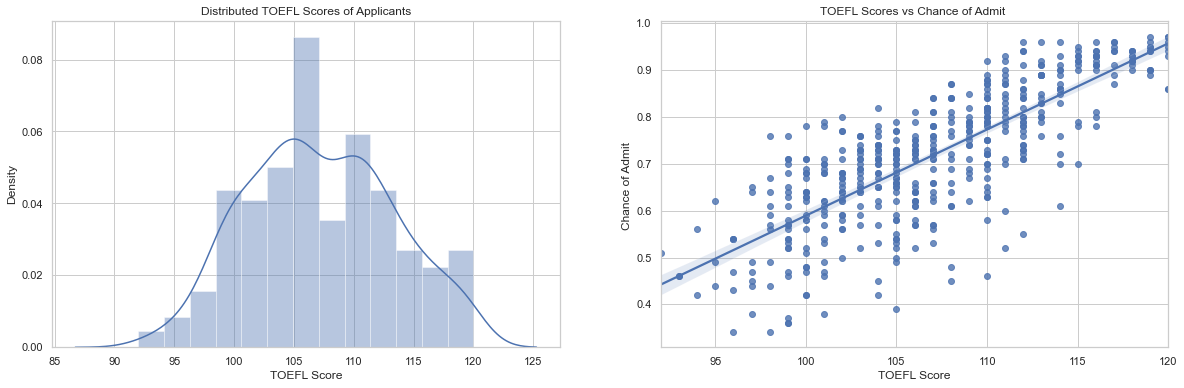

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit '])
plt.title('TOEFL Scores vs Chance of Admit ')

[Text(0, 0, 'No Research Experience'), Text(1, 0, 'Has Research Experience')]

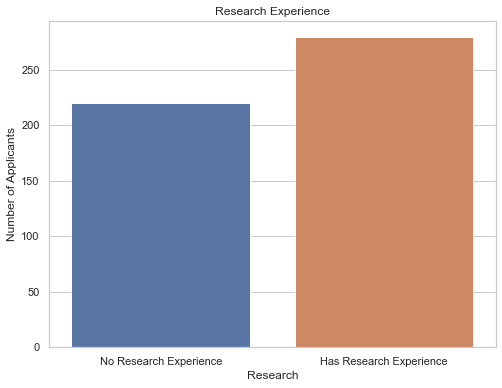

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

Text(0, 0.5, 'Number of Applicants')

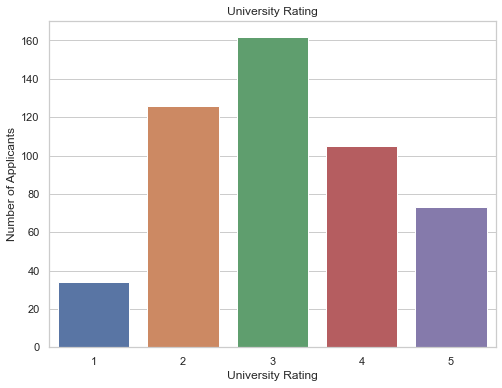

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

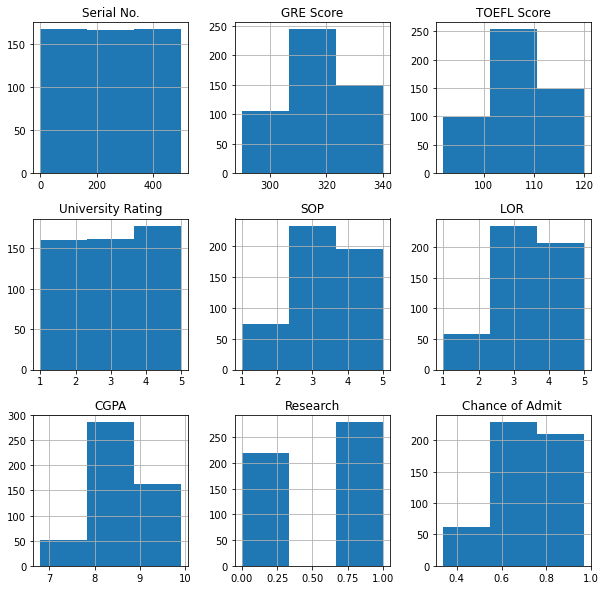

In [16]:
df.hist(bins=3,figsize=(10,10))
plt.show()

In [14]:
corr_matrix = df.corr()
corr_matrix["Chance of Admit "].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial No.           0.008505
Name: Chance of Admit , dtype: float64

In [18]:
X=df.drop(columns=['Serial No.','Chance of Admit '])
y=df[['Chance of Admit ']]

In [19]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (375, 7)
Shape of x_test : (125, 7)
Shape of y_train : (375, 1)
Shape of y_test : (125, 1)


In [22]:
# Predictive Models:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
# Building the model and Predicting on Test Set
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

y_pred = linreg_model.predict(X_test)

print("---------------------------------------")
print('Coefficients for independent variables:', dict(zip(X.columns,linreg_model.coef_[0])))
print("---------------------------------------")
print('Intercept:', linreg_model.intercept_)
print('Slope:' ,linreg_model.coef_)
print("---------------------------------------")

---------------------------------------
Coefficients for independent variables: {'GRE Score': 0.002215572811815205, 'TOEFL Score': 0.0026692947244477913, 'University Rating': 0.005725304459882126, 'SOP': 0.0008242851876230511, 'LOR ': 0.019162351211747173, 'CGPA': 0.11505163175985807, 'Research': 0.02348124363813988}
---------------------------------------
Intercept: [-1.35383376]
Slope: [[0.00221557 0.00266929 0.0057253  0.00082429 0.01916235 0.11505163
  0.02348124]]
---------------------------------------


In [24]:
# Evaluation of Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Another detailed way to calculate RMSE below:-

# mse2 = np.sum((linreg_pred - y_test)**2)

# # root mean squared error
# # m is the number of training examples
# rmse = np.sqrt(mse2/len(X_test))

r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Square : ", r2)

Root Mean Squared Error :  0.06180945616201748
R-Square :  0.7973334616338152


In [25]:
# Visual Representation of R square
lr_df = pd.DataFrame({'Actual':np.array(y_test)[:,0],'Predicted':y_pred[:,0]})

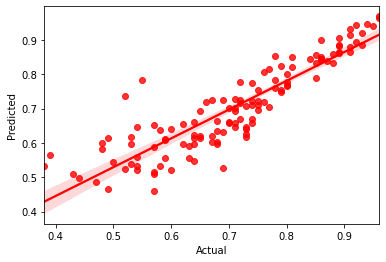

In [26]:
sns.regplot(lr_df['Actual'],lr_df['Predicted'],fit_reg=True,color='red')
plt.show()
plt.close()

In [27]:
# Cross Validation
# It basically means training the data on a part of the training set and testing/evaluating 
# it on the other part of the training set itself.
from sklearn.model_selection import cross_val_score
# cv variable tells in how many parts do we need to divide the data into a stratified manner.
scores = cross_val_score(linreg_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("RMSE scores :", rmse_scores)
print("Average RMSE value after cross validation :", np.mean(rmse_scores))

RMSE scores : [0.07114649 0.06374838 0.06086535 0.0434654  0.05987385 0.05111631
 0.06589091 0.05788127 0.04792949 0.07115872]
Average RMSE value after cross validation : 0.05930761643061544


In [28]:
# 2. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Building the model and predicting on test set
forest_model = RandomForestRegressor(n_estimators=10, random_state=2)
forest_model.fit(X_train, y_train)

y_pred=forest_model.predict(X_test)

forest_model

RandomForestRegressor(n_estimators=10, random_state=2)

In [30]:
# Evaluation of Model
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error : ",forest_rmse)
print("R-Square :", forest_r2)

Root Mean Squared Error :  0.06273359546526885
R-Square : 0.7912278503875843


In [31]:
# Cross Validation
from sklearn.model_selection import cross_val_score
# cv variable tells in how many parts do we need to divide the data into a stratified manner.
scores = cross_val_score(forest_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("RMSE scores :", rmse_scores)
print("Average RMSE value after cross validation :", np.mean(rmse_scores))

RMSE scores : [0.08278046 0.07528123 0.06988449 0.05099794 0.06712792 0.06229854
 0.0792935  0.05860864 0.05240203 0.07665066]
Average RMSE value after cross validation : 0.06753254214103374


In [ ]:
# Conclusion: Both the models performed well but based on the RMSE values 
# the performance of Random Forest Regressor is best and Linear Regression is lowest.